# EDA Job Descriptions

In [1]:
from text_data_toolkit import data_cleaning as dc
from text_data_toolkit import data_transformation as dt
from text_data_toolkit import eda
from text_data_toolkit import file_operations as fop
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# check out files in data folder
fop.list_files('../data')

['DataScientist.csv',
 'job_postings.csv',
 'job_skills.csv',
 'job_summary.csv',
 'job_summary_mini.csv',
 'Restaurant_Reviews.csv',
 'Restaurant_Reviews.tsv',
 'Restaurant_Reviews2.txt',
 'Restaurant_Reviews_Test.tsv']

In [3]:
# import data to dfs using method from data_cleaning
# DataScientist.csv is from 2020
# job_summary is from 2024
# we will see how much has changed and what employers look for
files = ['../data/DataScientist.csv',
         '../data/job_summary.csv',
         '../data/job_skills.csv',
         '../data/job_postings.csv']

dfs = dc.load_text_to_df(files, columns = None, line_length = 1)


In [4]:
dfs

{'DataScientist':       Unnamed: 0  index                                          Job Title  \
 0              0      0                              Senior Data Scientist   
 1              1      1                  Data Scientist, Product Analytics   
 2              2      2                               Data Science Manager   
 3              3      3                                       Data Analyst   
 4              4      4                             Director, Data Science   
 ...          ...    ...                                                ...   
 3904        3904   4375                                  AWS Data Engineer   
 3905        3905   4376                              Data Analyst â Junior   
 3906        3906   4377                   Security Analytics Data Engineer   
 3907        3907   4378                   Security Analytics Data Engineer   
 3908        3908   4379  Patient Safety Physician or Safety Scientist -...   
 
                    Salary Estima

In [5]:
# 2020 data set
df_ds_jobs_raw = dfs['DataScientist']
df_ds_jobs_raw.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


In [6]:
# move onto 2024
df_job_summaries_raw = dfs['job_summary']
df_job_summaries_raw.shape

(12217, 2)

In [7]:
df_job_skills_raw = dfs['job_skills']
df_job_skills_raw.shape

(12217, 2)

In [8]:
df_job_postings_raw = dfs['job_postings']
df_job_postings_raw.shape

(12217, 15)

The job_ csvs have the same amount of rows in all files so we may be able to join these into one df.


In [9]:
print("First index")
print(df_job_summaries_raw.iloc[0, 0])
print(df_job_skills_raw.iloc[0, 0])
print(df_job_postings_raw.iloc[0, 0])
print("Random Index")
print(df_job_summaries_raw.iloc[876, 0])
print(df_job_skills_raw.iloc[876, 0])
print(df_job_postings_raw.iloc[876, 0])


First index
https://www.linkedin.com/jobs/view/senior-machine-learning-engineer-at-jobs-for-humanity-3804053819
https://www.linkedin.com/jobs/view/senior-machine-learning-engineer-at-jobs-for-humanity-3804053819
https://www.linkedin.com/jobs/view/senior-machine-learning-engineer-at-jobs-for-humanity-3804053819
Random Index
https://uk.linkedin.com/jobs/view/senior-data-analyst-financial-crime-at-nala-3805461162
https://uk.linkedin.com/jobs/view/senior-data-analyst-financial-crime-at-nala-3805461162
https://uk.linkedin.com/jobs/view/senior-data-analyst-financial-crime-at-nala-3805461162


Upon double checking, the rows do line up with eachother by index, so this would be an easy join. They could have been joined off of job_link either way

In [10]:
# join the job_ tables
merged_jobs_raw_2 = pd.merge(df_job_summaries_raw, df_job_postings_raw, left_index=True, right_index=True)
merged_jobs_raw = pd.merge(merged_jobs_raw_2, df_job_skills_raw, left_index=True, right_index=True)
print(merged_jobs_raw.shape) # check column count
merged_jobs_raw.head() # check that merge worked

(12217, 19)


,job_link_x,job_summary,job_link_y,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_link,job_skills
0,https://www.linkedin.com/jobs/view/senior-mach...,Company Description\nJobs for Humanity is part...,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,Finished NER,t,t,f,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",2024-01-14,East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite,https://www.linkedin.com/jobs/view/senior-mach...,"Machine Learning, Programming, Python, Scala, ..."
1,https://www.linkedin.com/jobs/view/principal-s...,Who We Are\nAurora (Nasdaq: AUR) is delivering...,https://www.linkedin.com/jobs/view/principal-s...,2024-01-20 04:02:12.331406+00,Finished NER,t,t,f,"Principal Software Engineer, ML Accelerators",Aurora,"San Francisco, CA",2024-01-14,El Cerrito,United States,Set-Key Driver,Mid senior,Onsite,https://www.linkedin.com/jobs/view/principal-s...,"C++, Python, PyTorch, TensorFlow, MXNet, CUDA,..."
2,https://www.linkedin.com/jobs/view/senior-etl-...,"Location: New York City, NY\nPosition Summary\...",https://www.linkedin.com/jobs/view/senior-etl-...,2024-01-21 08:08:31.941595+00,Finished NER,t,t,f,Senior ETL Data Warehouse Specialist,Adame Services LLC,"New York, NY",2024-01-14,Middletown,United States,Technical Support Specialist,Associate,Onsite,https://www.linkedin.com/jobs/view/senior-etl-...,"ETL, Data Integration, Data Transformation, Da..."
3,https://www.linkedin.com/jobs/view/senior-data...,Responsibilities:\nCandidate must have signifi...,https://www.linkedin.com/jobs/view/senior-data...,2024-01-20 15:30:55.796572+00,Finished NER,t,t,f,Senior Data Warehouse Developer / Architect,Morph Enterprise,"Harrisburg, PA",2024-01-12,Lebanon,United States,Architect,Mid senior,Onsite,https://www.linkedin.com/jobs/view/senior-data...,"Data Lakes, Data Bricks, Azure Data Factory Pi..."
4,https://www.linkedin.com/jobs/view/lead-data-e...,Dice is the leading career destination for tec...,https://www.linkedin.com/jobs/view/lead-data-e...,2024-01-21 08:08:58.312124+00,Finished NER,t,t,f,Lead Data Engineer,Dice,"Plano, TX",2024-01-14,McKinney,United States,Maintenance Data Analyst,Mid senior,Onsite,https://www.linkedin.com/jobs/view/lead-data-e...,"Java, Scala, Python, RDBMS, NoSQL, Redshift, S..."


# Clean Job Summaries


In [11]:
# clean df of whitespaces and punctuation
merged_jobs_raw_clean_summary = dc.clean_dataframe_no_dups(merged_jobs_raw, "job_summary")
merged_jobs_raw_clean_summary.head()

,job_link_x,job_summary,job_link_y,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_link,job_skills
0,https://www.linkedin.com/jobs/view/senior-mach...,company description jobs for humanity is partn...,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,Finished NER,t,t,f,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",2024-01-14,East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite,https://www.linkedin.com/jobs/view/senior-mach...,"Machine Learning, Programming, Python, Scala, ..."
1,https://www.linkedin.com/jobs/view/principal-s...,who we are aurora nasdaq aur is delivering the...,https://www.linkedin.com/jobs/view/principal-s...,2024-01-20 04:02:12.331406+00,Finished NER,t,t,f,"Principal Software Engineer, ML Accelerators",Aurora,"San Francisco, CA",2024-01-14,El Cerrito,United States,Set-Key Driver,Mid senior,Onsite,https://www.linkedin.com/jobs/view/principal-s...,"C++, Python, PyTorch, TensorFlow, MXNet, CUDA,..."
2,https://www.linkedin.com/jobs/view/senior-etl-...,location new york city ny position summary our...,https://www.linkedin.com/jobs/view/senior-etl-...,2024-01-21 08:08:31.941595+00,Finished NER,t,t,f,Senior ETL Data Warehouse Specialist,Adame Services LLC,"New York, NY",2024-01-14,Middletown,United States,Technical Support Specialist,Associate,Onsite,https://www.linkedin.com/jobs/view/senior-etl-...,"ETL, Data Integration, Data Transformation, Da..."
3,https://www.linkedin.com/jobs/view/senior-data...,responsibilities candidate must have significa...,https://www.linkedin.com/jobs/view/senior-data...,2024-01-20 15:30:55.796572+00,Finished NER,t,t,f,Senior Data Warehouse Developer / Architect,Morph Enterprise,"Harrisburg, PA",2024-01-12,Lebanon,United States,Architect,Mid senior,Onsite,https://www.linkedin.com/jobs/view/senior-data...,"Data Lakes, Data Bricks, Azure Data Factory Pi..."
4,https://www.linkedin.com/jobs/view/lead-data-e...,dice is the leading career destination for tec...,https://www.linkedin.com/jobs/view/lead-data-e...,2024-01-21 08:08:58.312124+00,Finished NER,t,t,f,Lead Data Engineer,Dice,"Plano, TX",2024-01-14,McKinney,United States,Maintenance Data Analyst,Mid senior,Onsite,https://www.linkedin.com/jobs/view/lead-data-e...,"Java, Scala, Python, RDBMS, NoSQL, Redshift, S..."


In [12]:
# skill count
dt.label_job_skills(merged_jobs_raw_clean_summary, "job_summary", custom_skills=None)

{'python': 6746,
 'react': 315,
 'pytorch': 650,
 'nlp': 630,
 'tableau': 2263,
 'regex': 10,
 'html': 203,
 'scikit': 349,
 'sql': 12401,
 'snowflake': 2295,
 'cloud': 10457,
 'pyspark': 496,
 'javascript': 244}

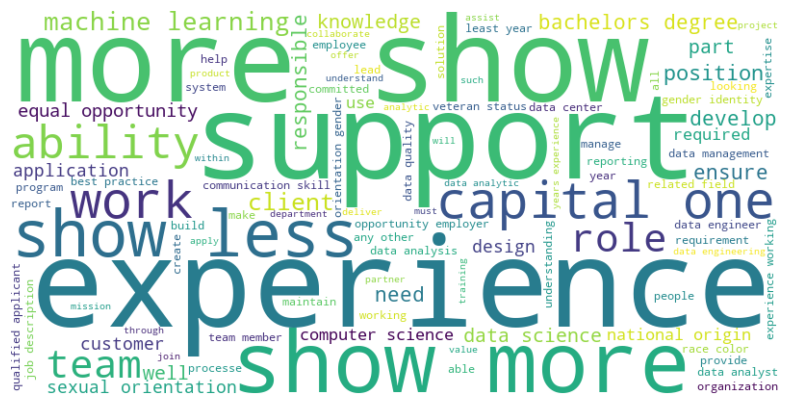

In [13]:
# generate word cloud from descriptions - 12s
eda.generate_wordcloud(merged_jobs_raw_clean_summary["job_summary"])

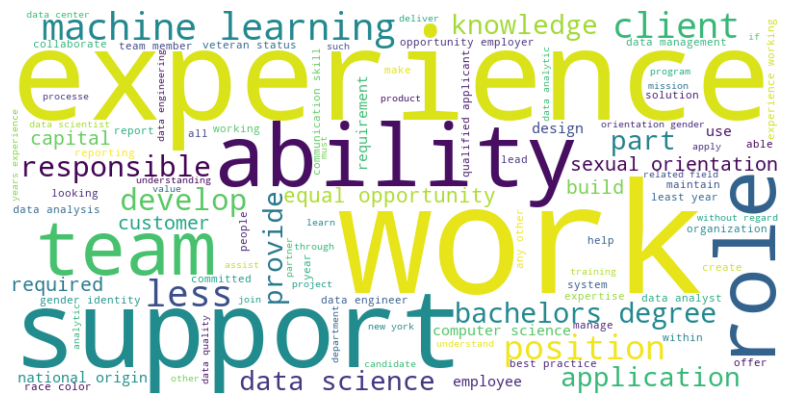

In [14]:
# generate word cloud with more stop words - 11s
more_stopwords = ["show", "more", "job", "one", "need", "ensure", "well", "will"]
eda.generate_wordcloud(merged_jobs_raw_clean_summary["job_summary"], more_stopwords)

In [15]:
eda.text_summary_stats(merged_jobs_raw_clean_summary, "job_summary")

{'document_stats': {'total_docs': 12217, 'empty_docs': 0, 'unique_docs': 9536},
 'length_stats': {'min_length': 20,
  'max_length': 18826,
  'total_length': 50766361,
  'char_count_mean': 4155.386838012605,
  'char_count_median': 3883},
 'word_stats': {'avg_words_per_doc': 605.3288041253991,
  'total_words': 7395302,
  'unique_words': 68955,
  'avg_word_length': 5.866325134524594},
 'frequent_words': {'data': 122972,
  'experience': 65830,
  'work': 35210,
  'team': 29123,
  'business': 28420,
  'skills': 22749,
  'years': 22528,
  'management': 20962,
  'other': 20781,
  'all': 19284}}

Data shows up as the most frequent word, but not in the word cloud. The word cloud is pairing data with other words. ie. "Data Management", "Data Science"

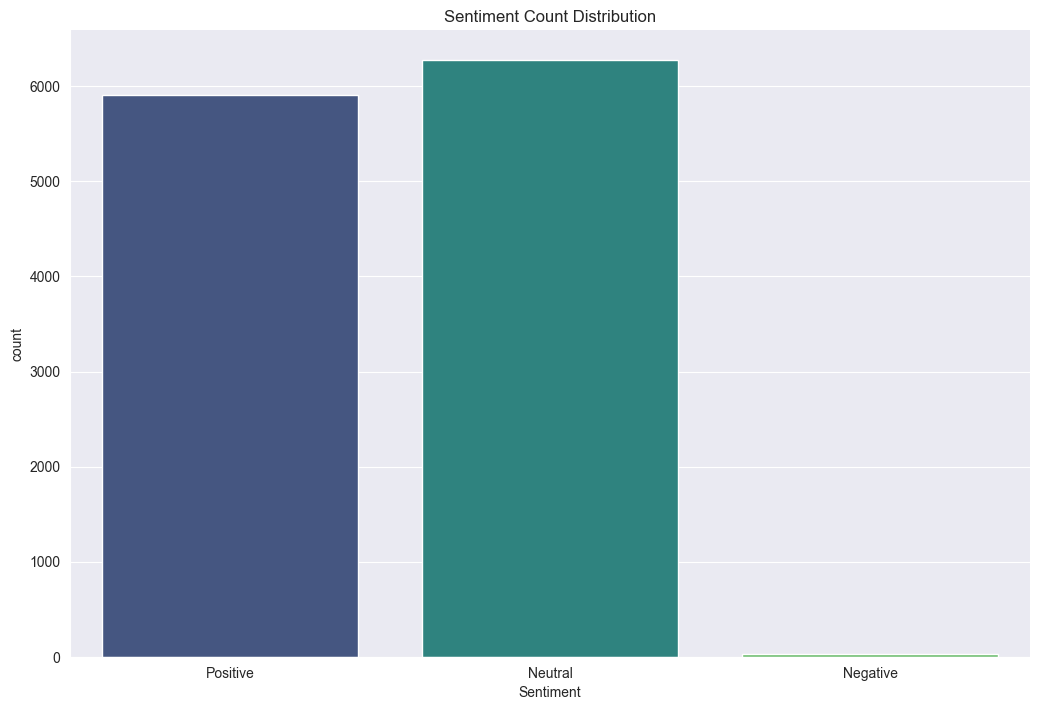

,job_link_x,job_summary,job_link_y,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_link,job_skills,Sentiment
0,https://www.linkedin.com/jobs/view/senior-mach...,company description jobs for humanity is partn...,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,Finished NER,t,t,f,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",2024-01-14,East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite,https://www.linkedin.com/jobs/view/senior-mach...,"Machine Learning, Programming, Python, Scala, ...",Positive
1,https://www.linkedin.com/jobs/view/principal-s...,who we are aurora nasdaq aur is delivering the...,https://www.linkedin.com/jobs/view/principal-s...,2024-01-20 04:02:12.331406+00,Finished NER,t,t,f,"Principal Software Engineer, ML Accelerators",Aurora,"San Francisco, CA",2024-01-14,El Cerrito,United States,Set-Key Driver,Mid senior,Onsite,https://www.linkedin.com/jobs/view/principal-s...,"C++, Python, PyTorch, TensorFlow, MXNet, CUDA,...",Neutral
2,https://www.linkedin.com/jobs/view/senior-etl-...,location new york city ny position summary our...,https://www.linkedin.com/jobs/view/senior-etl-...,2024-01-21 08:08:31.941595+00,Finished NER,t,t,f,Senior ETL Data Warehouse Specialist,Adame Services LLC,"New York, NY",2024-01-14,Middletown,United States,Technical Support Specialist,Associate,Onsite,https://www.linkedin.com/jobs/view/senior-etl-...,"ETL, Data Integration, Data Transformation, Da...",Neutral
3,https://www.linkedin.com/jobs/view/senior-data...,responsibilities candidate must have significa...,https://www.linkedin.com/jobs/view/senior-data...,2024-01-20 15:30:55.796572+00,Finished NER,t,t,f,Senior Data Warehouse Developer / Architect,Morph Enterprise,"Harrisburg, PA",2024-01-12,Lebanon,United States,Architect,Mid senior,Onsite,https://www.linkedin.com/jobs/view/senior-data...,"Data Lakes, Data Bricks, Azure Data Factory Pi...",Positive
4,https://www.linkedin.com/jobs/view/lead-data-e...,dice is the leading career destination for tec...,https://www.linkedin.com/jobs/view/lead-data-e...,2024-01-21 08:08:58.312124+00,Finished NER,t,t,f,Lead Data Engineer,Dice,"Plano, TX",2024-01-14,McKinney,United States,Maintenance Data Analyst,Mid senior,Onsite,https://www.linkedin.com/jobs/view/lead-data-e...,"Java, Scala, Python, RDBMS, NoSQL, Redshift, S...",Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12212,https://uk.linkedin.com/jobs/view/data-reporti...,football association make an impact on and off...,https://uk.linkedin.com/jobs/view/data-reporti...,2024-01-21 07:11:22.099082+00,Finished NER,t,t,f,"Data Reporting Manager, FOOTBALL ASSOCIATION",Guardian Jobs,"Wembley, England, United Kingdom",2024-01-16,High Wycombe,United Kingdom,Manager Forms Analysis,Mid senior,Onsite,https://uk.linkedin.com/jobs/view/data-reporti...,"Dashboard development, Reporting, Power BI, SQ...",Positive
12213,https://www.linkedin.com/jobs/view/corporate-a...,about the role please note review of applicant...,https://www.linkedin.com/jobs/view/corporate-a...,2024-01-19 15:10:41.177008+00,Finished NER,t,t,f,Corporate AML Alert Investigation Specialist,"Glacier Bancorp, Inc.","Kalispell, MT",2024-01-14,Montana,United States,Teller,Mid senior,Onsite,https://www.linkedin.com/jobs/view/corporate-a...,"Investigation, Antimoney laundering, Fraud, Ba...",Positive
12214,https://www.linkedin.com/jobs/view/senior-data...,about highnote founded in 2020 by a team of le...,https://www.linkedin.com/jobs/view/senior-data...,2024-01-20 15:20:19.036168+00,Finished NER,t,t,f,Senior Data Scientist,Highnote,"San Francisco, CA",2024-01-16,San Rafael,United States,Mathematician,Mid senior,Onsite,https://www.linkedin.com/jobs/view/senior-data...,"Data Science, Quantitative Modeling, SQL, Data...",Positive
12215,https://www.linkedin.com/jobs

In [16]:
eda.plot_sentiment_distribution(merged_jobs_raw_clean_summary, "job_summary")

The negative plot being empty make sense as you wouldn't want to see negative descriptions where you want to attract applicants

In [17]:
# top ngrams
eda.top_ngrams(merged_jobs_raw_clean_summary["job_summary"])

[(('of', 'the'), 20853),
 (('in', 'the'), 20410),
 (('ability', 'to'), 16006),
 (('experience', 'with'), 15359),
 (('years', 'of'), 15308),
 (('experience', 'in'), 14467),
 (('will', 'be'), 12743),
 (('more', 'show'), 12233),
 (('show', 'more'), 12206),
 (('show', 'less'), 12206)]

In [20]:
# top ngrams with stopwords
stopwords = ['of', 'the', 'be', 'to', 'show', 'equal', 'as', 'this']
eda.top_ngrams(merged_jobs_raw_clean_summary["job_summary"], stopwords, n=3, top_k=15)

[(('years', 'experience', 'in'), 4834),
 (('an', 'opportunity', 'employer'), 3305),
 (('years', 'experience', 'with'), 3180),
 (('sexual', 'orientation', 'gender'), 3128),
 (('or', 'any', 'other'), 3086),
 (('orientation', 'gender', 'identity'), 2883),
 (('bachelors', 'degree', 'in'), 2865),
 (('is', 'an', 'opportunity'), 2652),
 (('in', 'computer', 'science'), 2347),
 (('4', 'years', 'experience'), 2249),
 (('for', 'employment', 'without'), 1938),
 (('3', 'years', 'experience'), 1924),
 (('all', 'qualified', 'applicants'), 1913),
 (('2', 'years', 'experience'), 1896),
 (('employment', 'without', 'regard'), 1882)]